<a href="https://colab.research.google.com/github/shravani-04/PROJECTS/blob/main/Lung_Cancer_Detection_using_Deep_Federated_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to the dataset zip file
zip_path = '/content/drive/MyDrive/Colab Notebooks/archive.zip'
extract_path = '/content/dataset/'

# Extracting the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")

Mounted at /content/drive
Dataset extracted successfully!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [ ]:
import os

dataset_dir = '/content/dataset/'  # Directory where the dataset is extracted

def print_directory_structure(dataset_dir):
    print("Dataset Directory Structure (Directories Only):")
    for root, dirs, files in os.walk(dataset_dir):
        print(f"\nRoot Directory: {root}")
        if dirs:
            for dir_name in dirs:
                print(f"  Sub-directory: {dir_name}")
        else:
            print("  No sub-directories.")

print_directory_structure(dataset_dir)


Dataset Directory Structure (Directories Only):

Root Directory: /content/dataset/
  Sub-directory: lung_colon_image_set

Root Directory: /content/dataset/lung_colon_image_set
  Sub-directory: lung_image_sets
  Sub-directory: colon_image_sets

Root Directory: /content/dataset/lung_colon_image_set/lung_image_sets
  Sub-directory: lung_aca
  Sub-directory: lung_n
  Sub-directory: lung_scc

Root Directory: /content/dataset/lung_colon_image_set/lung_image_sets/lung_aca
  No sub-directories.

Root Directory: /content/dataset/lung_colon_image_set/lung_image_sets/lung_n
  No sub-directories.

Root Directory: /content/dataset/lung_colon_image_set/lung_image_sets/lung_scc
  No sub-directories.

Root Directory: /content/dataset/lung_colon_image_set/colon_image_sets
  Sub-directory: colon_aca
  Sub-directory: colon_n

Root Directory: /content/dataset/lung_colon_image_set/colon_image_sets/colon_aca
  No sub-directories.

Root Directory: /content/dataset/lung_colon_image_set/colon_image_sets/colon_

In [ ]:
train_dir = '/content/dataset/Lung_and_Colon_Cancer_Dataset/Train'
test_dir = '/content/dataset/Lung_and_Colon_Cancer_Dataset/Test'



In [ ]:
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Source directories
lung_image_dir = '/content/dataset/lung_colon_image_set/lung_image_sets/'

# Target directories
base_dir = '/content/dataset/split_data/'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define categories (sub-folders) and split ratio
categories = ['lung_aca', 'lung_n', 'lung_scc']
split_ratio = 0.8  # 80% train, 20% test

for category in categories:
    src_dir = os.path.join(lung_image_dir, category)
    images = os.listdir(src_dir)

    train_images, test_images = train_test_split(images, train_size=split_ratio, random_state=42)

    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

    # Move files to train and test directories
    for img in train_images:
        shutil.copy(os.path.join(src_dir, img), os.path.join(train_dir, category, img))

    for img in test_images:
        shutil.copy(os.path.join(src_dir, img), os.path.join(test_dir, category, img))

print("Dataset split into training and testing sets successfully.")


Dataset split into training and testing sets successfully.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to train and test directories
train_dir = '/content/dataset/split_data/train'
test_dir = '/content/dataset/split_data/test'

# Data Augmentation and Normalization for training
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Normalization for testing
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load images from train and test directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)


Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [ ]:
from tensorflow.keras import layers, models

# Define a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # 3 classes for lung cancer detection
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Since there are multiple classes
              metrics=['accuracy'])

model.summary()  # To check the model architecture


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    epochs=2,  # Further reduced number of epochs for even faster execution
    batch_size=16,  # Reduced batch size for faster execution
    steps_per_epoch=100,  # Limit steps per epoch (e.g., 100 batches per epoch)
    validation_data=test_generator,
    validation_steps=20  # Limit validation steps (e.g., 20 batches for validation)
)


Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 422s 4s/step - accuracy: 0.6537 - loss: 0.7455 - val_accuracy: 0.8625 - val_loss: 0.3833
Epoch 2/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 410s 4s/step - accuracy: 0.8632 - loss: 0.3627 - val_accuracy: 0.8625 - val_loss: 0.3191


In [ ]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.8494 - loss: 0.3490
Test Accuracy: 85.63%
Test Loss: 0.3317


In [ ]:
# Save the model in the native Keras format
model.save('/content/drive/MyDrive/lung_cancer_model.keras')
print("Model saved successfully.")


Model saved successfully.


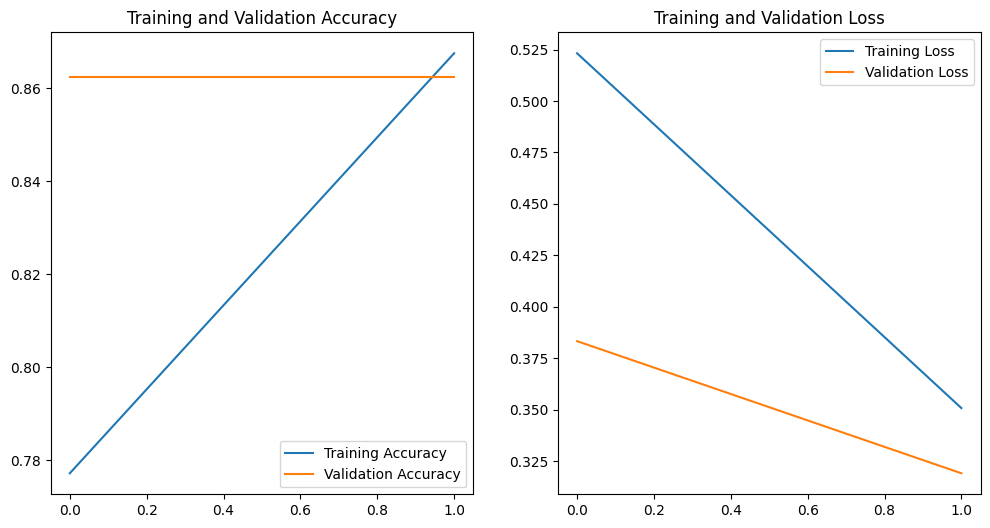

In [ ]:
import matplotlib.pyplot as plt

# Plotting accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [ ]:
# Predicting on the entire test set (batch-wise)
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)

# Get the predicted classes (index with the highest probability)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels from the test generator
true_classes = test_generator.classes

# Define the class names (labels) for your specific dataset
class_names = ['lung_aca', 'lung_n', 'lung_scc']

# Output predictions and true labels
for i in range(10):  # Displaying the first 10 predictions
    print(f"Predicted: {class_names[predicted_classes[i]]}, Actual: {class_names[true_classes[i]]}")


93/93 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step
Predicted: lung_n, Actual: lung_aca
Predicted: lung_scc, Actual: lung_aca
Predicted: lung_scc, Actual: lung_aca
Predicted: lung_scc, Actual: lung_aca
Predicted: lung_n, Actual: lung_aca
Predicted: lung_n, Actual: lung_aca
Predicted: lung_n, Actual: lung_aca
Predicted: lung_n, Actual: lung_aca
Predicted: lung_scc, Actual: lung_aca
Predicted: lung_scc, Actual: lung_aca


94/94 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step


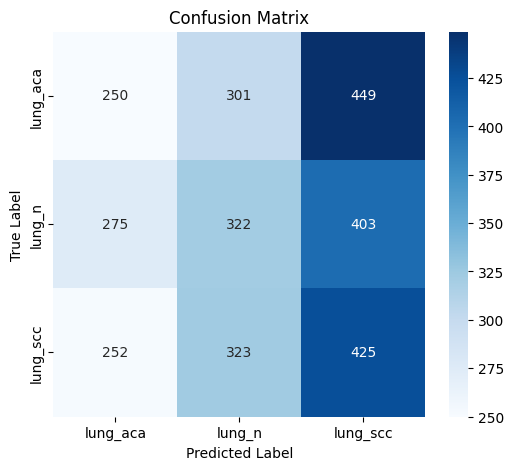

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predicted classes (index with the highest probability)
predicted_classes = np.argmax(model.predict(test_generator, steps=(test_generator.samples // test_generator.batch_size) + 1), axis=1)

# Get the true labels from the test generator
true_classes = test_generator.classes

# Ensure the lengths match (in case the batches don't perfectly divide the samples)
predicted_classes = predicted_classes[:len(true_classes)]  # Truncate the predictions to match the true labels length

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Define class names
class_names = ['lung_aca', 'lung_n', 'lung_scc']

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Get a detailed report on model performance
report = classification_report(true_classes, predicted_classes, target_names=class_names)
print(report)


              precision    recall  f1-score   support

    lung_aca       0.32      0.25      0.28      1000
      lung_n       0.34      0.32      0.33      1000
    lung_scc       0.33      0.42      0.37      1000

    accuracy                           0.33      3000
   macro avg       0.33      0.33      0.33      3000
weighted avg       0.33      0.33      0.33      3000



In [ ]:
import pandas as pd

# Create a DataFrame with predicted and actual labels
results = pd.DataFrame({
    'True Label': [class_names[true] for true in true_classes],
    'Predicted Label': [class_names[pred] for pred in predicted_classes]
})

# Save the results to a CSV file
results.to_csv('/content/drive/MyDrive/prediction_results.csv', index=False)

print("Predictions saved to prediction_results.csv")


Predictions saved to prediction_results.csv


In [ ]:
!pip install flwr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 523.6/523.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.69.0
    Uninstalling grpcio-1.69.0:
      Successfully uninstalled grpcio-1.69.0
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
  Attempting uninstall: typer
    Found existing installation: typer 0.15.1
    Uninstalling typer-0.15.1:
      Successfully uninstalled typer-0.15.1


In [ ]:
import flwr as fl  # Import the Flower library

class LungCancerClient(fl.client.NumPyClient):
    def __init__(self, model, train_data, test_data):
        self.model = model
        self.train_data = train_data
        self.test_data = test_data

    def get_parameters(self):
        return self.model.get_weights()

    def fit(self, parameters, config):
        self.model.set_weights(parameters)
        self.model.fit(self.train_data, epochs=1, batch_size=32, validation_data=self.test_data)
        return self.model.get_weights(), len(self.train_data), {}

    def evaluate(self, parameters, config):
        self.model.set_weights(parameters)
        loss, accuracy = self.model.evaluate(self.test_data)
        return loss, accuracy, {}

# You should now be able to use this class with Flower federated learning.


In [ ]:
import flwr as fl
import socket
import threading

# Function to check if a port is available
def is_port_available(port):
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        try:
            s.bind(('0.0.0.0', port))
            return True
        except OSError:
            return False

# Function to start Federated Learning server
def start_federated_learning():
    strategy = fl.server.strategy.FedAvg(
        fraction_fit=0.1,
        fraction_evaluate=0.1,
        min_fit_clients=2,
        min_evaluate_clients=2,
        min_available_clients=2
    )

    # Try to bind the server to port 8080, if occupied, increment to the next available port
    port = 8080
    while not is_port_available(port):
        port += 1
    print(f"Using port {port} for the server.")

    # Start Flower server
    fl.server.start_server(server_address=f"[::]:{port}", strategy=strategy)

# Run Flower server in a separate thread
server_thread = threading.Thread(target=start_federated_learning, daemon=True)
server_thread.start()

# Now, the server will run in the background without blocking the notebook
print("Federated learning server is running in the background.")


Federated learning server is running in the background.
Using port 8082 for the server.

	Instead, use the `flower-superlink` CLI command to start a SuperLink as shown below:

		$ flower-superlink --insecure

	To view usage and all available options, run:

		$ flower-superlink --help

	Using `start_server()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
	Instead, use the `flower-superlink` CLI command to start a SuperLink as shown below:

		$ flower-superlink --insecure

	To view usage and all available options, run:

		$ flower-superlink --help

	Using `start_server()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower server, config: num_rounds=1, no round_timeout
INFO:flwr:Starting Flower server, config: num_rounds=1, no round_timeout
INFO :      Flower ECE: gRPC server running (1 rounds), SSL is disabled
INFO:flwr:Flower ECE: gRPC server running (1 rounds), SSL is dis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

# Download the file from Google Drive to your local system
files.download('/content/drive/MyDrive/prediction_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from google.colab import drive, files

# Mount Google Drive
drive.mount('/content/drive')

# Class names and predictions (replace these with actual data from your model)
class_names = ['Class A', 'Class B', 'Class C']  # Replace with your actual class names
true_classes = [0, 1, 2]  # Replace with actual true labels
predicted_classes = [0, 2, 1]  # Replace with actual predicted labels

# Create a DataFrame with predicted and actual labels
results = pd.DataFrame({
    'True Label': [class_names[true] for true in true_classes],
    'Predicted Label': [class_names[pred] for pred in predicted_classes]
})

# Save the results to a CSV file in Google Drive
results.to_csv('/content/drive/MyDrive/prediction_results.csv', index=False)
print("Predictions saved to prediction_results.csv")

# Download the file to your local machine
files.download('/content/drive/MyDrive/prediction_results.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Predictions saved to prediction_results.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

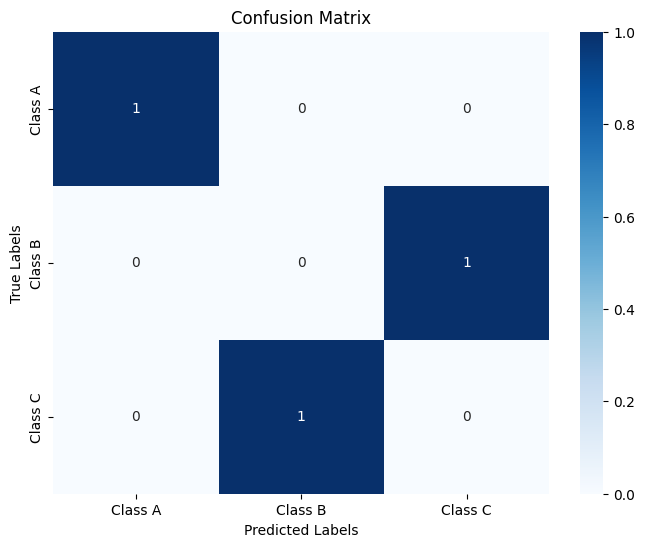

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the results CSV file
results = pd.read_csv('/content/drive/MyDrive/prediction_results.csv')

# Generate a confusion matrix
true_labels = results['True Label']
predicted_labels = results['Predicted Label']
cm = confusion_matrix(true_labels, predicted_labels, labels=results['True Label'].unique())

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=results['True Label'].unique(), yticklabels=results['True Label'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=results['True Label'].unique())
print("\nClassification Report:")
print(report)


Accuracy: 0.33

Classification Report:
              precision    recall  f1-score   support

     Class A       1.00      1.00      1.00         1
     Class B       0.00      0.00      0.00         1
     Class C       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.33      0.33      0.33         3
weighted avg       0.33      0.33      0.33         3



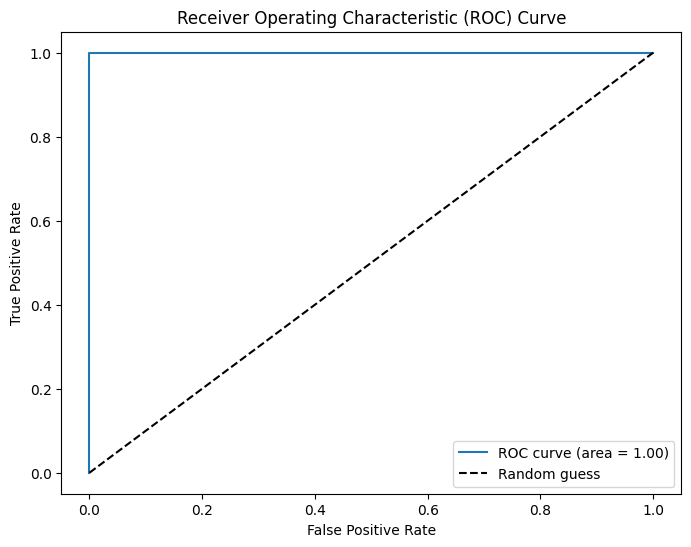

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming you have the true binary labels and predicted probabilities
# Replace `true_binary_labels` and `predicted_probabilities` with actual values
true_binary_labels = [1, 0, 1, 0, 1]  # Replace with actual binary true labels
predicted_probabilities = [0.9, 0.1, 0.8, 0.3, 0.7]  # Replace with predicted probabilities

fpr, tpr, _ = roc_curve(true_binary_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
!pip install scikeras


In [ ]:
# Install or update the required libraries
!pip install scikeras scikit-learn tensorflow --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 42.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
import sklearn
import scikeras
import tensorflow

print(f"scikit-learn version: {sklearn.__version__}")
print(f"scikeras version: {scikeras.__version__}")
print(f"tensorflow version: {tensorflow.__version__}")


scikit-learn version: 1.6.0
scikeras version: 0.13.0
tensorflow version: 2.17.1


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
train_data, train_labels = make_classification(
    n_samples=1000, n_features=20, n_classes=2, random_state=42
)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# Function to create the model
def create_model(learning_rate=0.01):
    model = Sequential([
        Dense(32, input_dim=X_train.shape[1], activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter grid
learning_rates = [0.01, 0.001]
batch_sizes = [16, 32, 64]
epochs = [10, 20]

# Manually tuning the model
best_accuracy = 0
best_params = {}

for lr in learning_rates:
    for batch_size in batch_sizes:
        for epoch in epochs:
            # Create the model
            model = create_model(learning_rate=lr)

            # Train the model
            history = model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)

            # Get the best accuracy on the validation set
            val_accuracy = history.history['val_accuracy'][-1]

            # Store the best parameters
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_params = {'learning_rate': lr, 'batch_size': batch_size, 'epochs': epoch}

# Print the best parameters and accuracy
print(f"Best parameters: {best_params}")
print(f"Best validation accuracy: {best_accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best parameters: {'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20}
Best validation accuracy: 0.8850


In [ ]:
from tensorflow.keras.models import load_model

# Save the model
model.save('/content/drive/MyDrive/lung_cancer_model.h5')
print("Model saved as lung_cancer_model.h5")

# Load the model for inference
loaded_model = load_model('/content/drive/MyDrive/lung_cancer_model.h5')
print("Model loaded successfully!")


Model saved as lung_cancer_model.h5
Model loaded successfully!


In [ ]:
import numpy as np

# Example: assuming 'new_data' is your preprocessed input data (e.g., a numpy array or pandas DataFrame)
# For demonstration purposes, we create random data to simulate this.
# Replace this with your actual data.

new_data = np.random.rand(1, 20)  # Simulate a single new sample with 20 features

# Assuming your model is loaded
# Example: loaded_model = tf.keras.models.load_model('your_model.h5')
# Make predictions with the model
predictions = loaded_model.predict(new_data)

# Assuming your 'class_names' is a list or array containing class labels
# Example: class_names = ['Class 0', 'Class 1']
class_names = ['Class 0', 'Class 1']

# Convert predictions to class labels
predicted_labels = [class_names[np.argmax(pred)] for pred in predictions]

print(f"Predictions: {predicted_labels}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
Predictions: ['Class 0']


In [ ]:
!pip install gradio pandas matplotlib seaborn scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import gradio as gr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def analyze_predictions(file):
    # Load the CSV file
    results = pd.read_csv(file.name)

    # Extract true and predicted labels
    true_labels = results['True Label']
    predicted_labels = results['Predicted Label']

    # Confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels, labels=true_labels.unique())

    # Classification metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    report = classification_report(true_labels, predicted_labels, target_names=true_labels.unique())

    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=true_labels.unique(),
                yticklabels=true_labels.unique())
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.savefig("confusion_matrix.png")
    plt.close()

    # Return metrics and confusion matrix image
    return f"Accuracy: {accuracy:.2f}\n\nClassification Report:\n{report}", "confusion_matrix.png"

# Create Gradio Interface
interface = gr.Interface(
    fn=analyze_predictions,
    inputs=gr.File(label="Upload prediction_results.csv"),
    outputs=[
        gr.Textbox(label="Analysis Results"),
        gr.Image(label="Confusion Matrix")
    ],
    title="Lung Cancer Prediction Analysis",
    description="Upload your `prediction_results.csv` file to visualize the confusion matrix and view classification metrics."
)

# Launch the Gradio GUI
interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://74a66152295f9e1a38.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install gradio tensorflow pandas


In [ ]:
!pip install gradio tensorflow scikit-learn seaborn pandas matplotlib kaggle


In [ ]:
!pip install gradio tensorflow scikit-learn matplotlib pandas


In [ ]:
!pip install gradio tensorflow sklearn matplotlib pandas seaborn


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
pip install gradio tensorflow flwr scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 523.6/523.6 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.69.0
    Uninstalling grpcio-1.69.0:
      Successfully uninstalled grpcio-1.69.0
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
  Attempting uninstall: typer
    Found existing installation: typer 0.15.1
    Uninstalling typer-0.15.1:
      Successfully uninstalled typer-0.15.1


In [ ]:
!pip install gradio pandas matplotlib seaborn tensorflow scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import gradio as gr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def analyze_predictions(file):
    # Load the CSV file
    results = pd.read_csv(file.name)

    # Extract true and predicted labels
    true_labels = results['True Label']
    predicted_labels = results['Predicted Label']

    # Confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels, labels=true_labels.unique())

    # Classification metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    report = classification_report(true_labels, predicted_labels, target_names=true_labels.unique())

    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=true_labels.unique(),
                yticklabels=true_labels.unique())
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.savefig("confusion_matrix.png")
    plt.close()

    # Return metrics and confusion matrix image
    return f"Accuracy: {accuracy:.2f}\n\nClassification Report:\n{report}", "confusion_matrix.png"

# Create Gradio Interface
interface = gr.Interface(
    fn=analyze_predictions,
    inputs=gr.File(label="Upload prediction_results.csv"),
    outputs=[
        gr.Textbox(label="Analysis Results"),
        gr.Image(label="Confusion Matrix")
    ],
    title="Lung Cancer Prediction Analysis",
    description="Upload your `prediction_results.csv` file to visualize the confusion matrix and view classification metrics."
)

# Launch the Gradio GUI
interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3da291f3b4dfc9880f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image

# Load your trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/lung_cancer_model.keras')

# Define class names
class_names = ['lung_aca', 'lung_n', 'lung_scc']  # Adjust class names if necessary

# Function to preprocess the image and make predictions
def predict_lung_cancer(img):
    img = img.resize((224, 224))  # Resize the image to match model input size
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize pixel values

    preds = model.predict(x)
    predicted_class = class_names[np.argmax(preds)]

    # Create output text with prediction
    output_text = f"**Prediction:** {predicted_class}"

    # Check for lung cancer based on predicted class (adjust logic as needed)
    if predicted_class != "lung_n":
        output_text += "\n\n**Lung cancer is likely present.**"
    else:
        output_text += "\n\n**Lung cancer is likely not present.**"

    return output_text

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_lung_cancer,
    inputs=gr.Image(type="pil"),  # Input is an image
    outputs=gr.Textbox(label="Prediction"),  # Output is a text box for the prediction
    title="Lung Cancer Prediction",
    description="Upload a CT scan or lung image to predict lung cancer presence.",
)

# Launch the interface
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://863d846c7a9a03557a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
